###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [1]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.
from google.colab import drive
drive.mount('/content/drive')
# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

Mounted at /content/drive


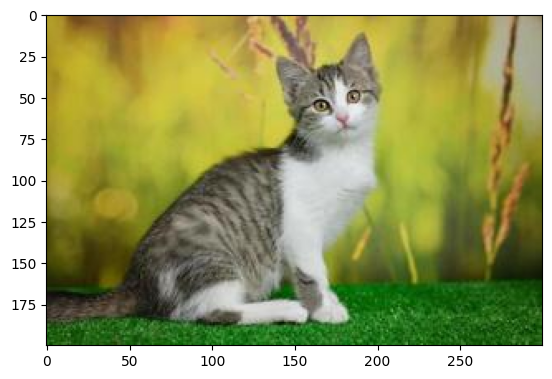

In [2]:
image = plt.imread("/content/drive/MyDrive/cat.jpg")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : Write code to find image dimension and print it

In [3]:
print(np.shape(image))

(200, 300, 3)


**Ans:** This is an rgb image as there are 3 channels. The height and width are 200, 300 respectively. so the aspect ratio for this image is 3:2



In [4]:
print(f"No. of channel: {image.shape[2]}")
print(f"Height: {image.shape[0]}, Width: {image.shape[1]}")

No. of channel: 3
Height: 200, Width: 300


###### Task1.2:  Visualization of each channel

In [15]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here
    output = image[:,:,channel]

    return output    # 'output' is image's particular channel values

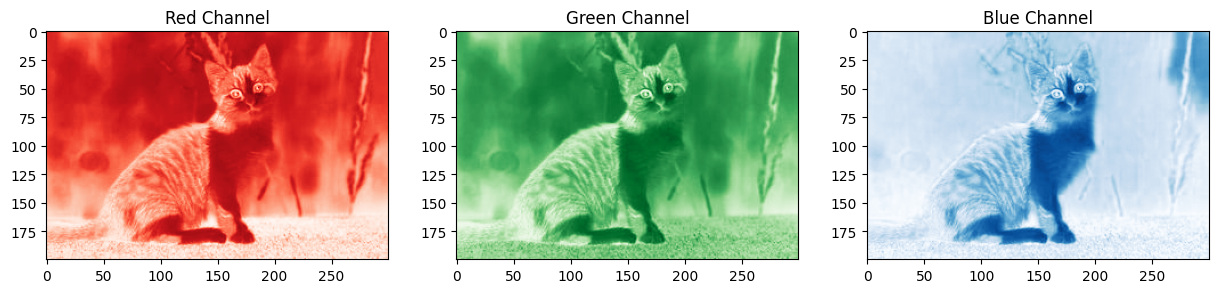

In [34]:
# Get channel information
red_channel = VisualizeChannel(image, 0)
green_channel = VisualizeChannel(image, 1)
blue_channel = VisualizeChannel(image,2)

# plot the channels
plt.figure(figsize = (15,5))
plt.subplot(1,3,1),plt.imshow(red_channel, cmap = 'Reds'), plt.title("Red Channel")
plt.subplot(1,3,2),plt.imshow(green_channel, cmap = 'Greens'), plt.title("Green Channel")
plt.subplot(1,3,3), plt.imshow(blue_channel, cmap = 'Blues'), plt.title("Blue Channel")
plt.show()


In [17]:
# Print min and max of each channel
print(f"Red Channel: Min={red_channel.min()}, Max={red_channel.max()}")
print(f"Green Channel: Min={green_channel.min()}, Max={green_channel.max()}")
print(f"Blue Channel: Min={blue_channel.min()}, Max={blue_channel.max()}")


Red Channel: Min=0, Max=252
Green Channel: Min=0, Max=243
Blue Channel: Min=0, Max=244


**Ans** The maximum is value is 252 in the red channel and minimum is 0 in all. This range (i.e 0-255) indicades that the image is in uint8 datatype.  

# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

In [18]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = np.dot(image[...,:3], [0.299, 0.587, 0.114])

    return gray       #'gray' is grayscale image, converted from RGB image

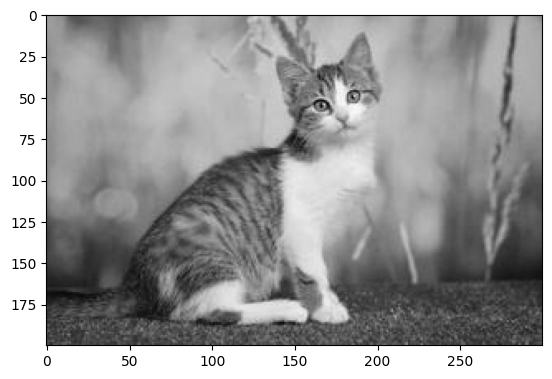

In [19]:
gray = RGB2Gray(image)
plt.imshow(gray, cmap = 'gray')

###### Task2.2 : Gray to Binary

**Ans:** It should be in the range between 0-255 if the image dtype is uint8 and 0-1 if the image is float32.

In [20]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray = RGB2Gray(image)
        img = gray
    else:
        img = image

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = np.where(img > T, 1, 0)

    #write code to visualize the resultant image
    plt.imshow(bimg, cmap = 'gray')
    plt.show()
    return bimg


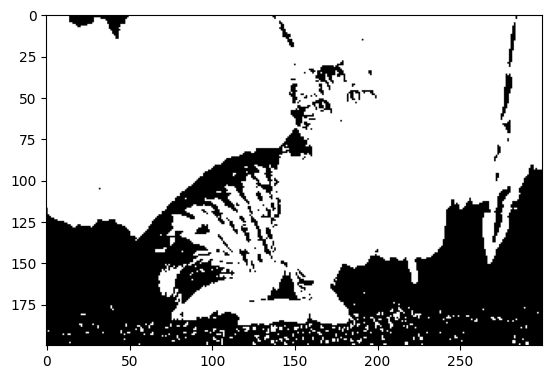

In [21]:
binary_image = Gray2Binary(gray,100)

######  Task2.3:  Crop a $5\times5$ section of a gray image

In [32]:

def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    flag = len(image.shape)
    if flag == 3:
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        img = RGB2Gray(image)
    else:
      img = image

    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = img[r0:r0+5,c0:c0+5]

    # visualize patch and print its value

    plt.imshow(patch, cmap = 'gray')
    plt.show()
    print(patch)

    return patch

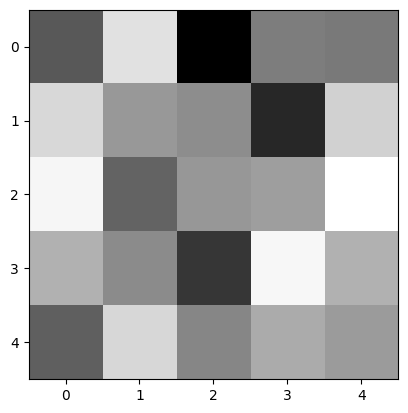

[[34.632 61.789 17.077 42.066 41.126]
 [60.017 47.305 45.066 24.838 58.61 ]
 [66.06  36.832 47.066 48.61  67.855]
 [52.288 44.821 27.838 66.083 52.225]
 [36.06  59.821 43.849 51.094 47.866]]


In [33]:
patch = ImageCrop(image,75,150)
# print(patch)
# plt.imshow(patch)

[[17.316  30.8945  8.5385 21.033  20.563 ]
 [30.0085 23.6525 22.533  12.419  29.305 ]
 [33.03   18.416  23.533  24.305  33.9275]
 [26.144  22.4105 13.919  33.0415 26.1125]
 [18.03   29.9105 21.9245 25.547  23.933 ]]
[[ 69.264 123.578  34.154  84.132  82.252]
 [120.034  94.61   90.132  49.676 117.22 ]
 [132.12   73.664  94.132  97.22  135.71 ]
 [104.576  89.642  55.676 132.166 104.45 ]
 [ 72.12  119.642  87.698 102.188  95.732]]
[[56.187 64.187 62.187 54.187 63.187]
 [59.187 65.187 68.187 66.187 73.187]
 [53.187 53.187 62.187 69.187 72.187]
 [79.187 88.187 88.187 83.187 64.187]
 [76.187 77.187 78.187 75.187 70.187]]
[[ 90.819 125.976  79.264  96.253 104.313]
 [119.204 112.492 113.253  91.025 131.797]
 [119.247  90.019 109.253 117.797 140.042]
 [131.475 133.008 116.025 149.27  116.412]
 [112.247 137.008 122.036 126.281 118.053]]
[[-21.555  -2.398 -45.11  -12.121 -22.061]
 [  0.83  -17.882 -23.121 -41.349 -14.577]
 [ 12.873 -16.355 -15.121 -20.577  -4.332]
 [-26.899 -43.366 -60.349 -17.10

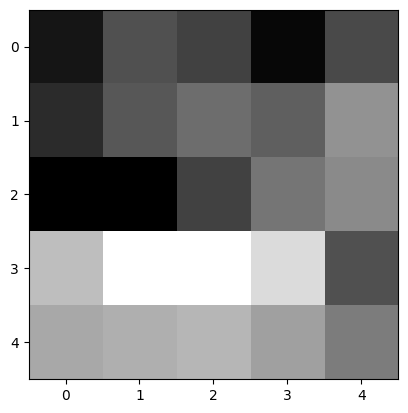

In [24]:
# 2.3.1 Multiply by 0.5
mat_mul_1 = patch * 0.5
print(mat_mul_1)

# 2.3.2 Multiply by 0.2
mat_mul_2 = patch * 2
print(mat_mul_2)

# 2.3.3 Add and subtract another 5x5 patch
patch2 = ImageCrop(image, 100, 100)
mat_add = patch + patch2
print(mat_add)

mat_sub = patch - patch2
print(mat_sub)

###### Task2.4: Uniform Brightness Scaling

In [25]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    bright_img = image * scale
    bright_img = bright_img.clip(0, 255).astype('uint8')
    #display the resultant image
    plt.subplot(121),plt.imshow(image),plt.axis("off"), plt.title("Input")
    plt.subplot(122),plt.imshow(bright_img, cmap='gray'),plt.axis("off"), plt.title(f"Output with scale {scale}")
    plt.show()
    return bright_img        #replace output with the variable name you used for final result


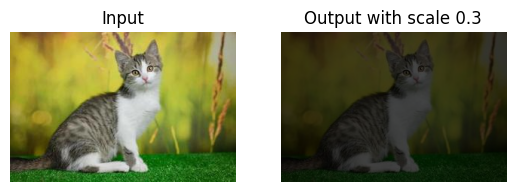

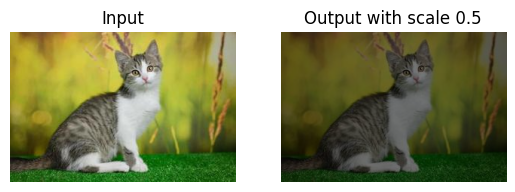

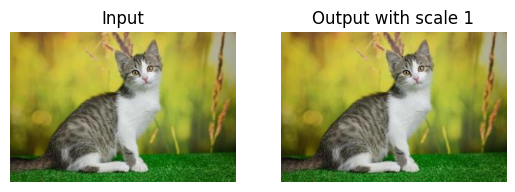

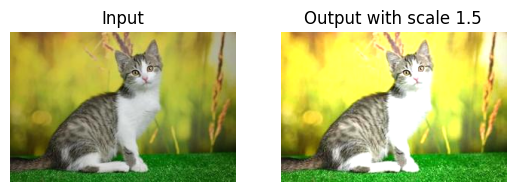

In [26]:
scales = [0.3,0.5,1,1.5]
for scale in scales:
    bright_image = UniformBrightScaling(image, scale)

**Ans** The whole image is uniformly brightened or dimmed. The scale paramtere is acting as gain controler of the image.

# 3. Image Filtering

In [27]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        #write code to convert it to gray scale
        image = RGB2Gray(image)
    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)

    r, c = image.shape
    kr, kc = kernel.shape
    output = np.zeros((r, c))

    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    pad_img = np.zeros((r + kr - 1, c + kc -1))

    #now copy gray image to above created array at location starting from (1,1)
    pad_img[kr//2:-(kr//2), kc//2: -(kc//2)] = image

    #write code to convolve the image
    for row in range(r):     # use appropiate range values for row and col
        for col in range(c):
            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both (or directly take element wise multiplication and sum it)
            # store this scalar value to output matrix with starting location (0,0)         (alternatively one could also create a list and reshape it to output size)
            output[row, col] = np.sum(kernel * pad_img[row: row + kr, col :  col + kc])
    return output

In [28]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

kernels = {"identity" : np.array([[0,0,0],
                                  [0,1,0],
                                  [0,0,0]]),

           "edge_detection" : np.array([[-1,-1,-1],
                                        [-1,8,-1],
                                        [-1,-1,-1]]),
           "sharpen" : np.array([[0,-1,0],
                                [-1,5,-1],
                                [0,-1,0]]),

           "box_blur" : np.array([[1,1,1],
                                  [1,1,1],
                                  [1,1,1]])/9,

           "gaussian_3" : np.array([[1,2,1],
                                    [2,4,2],
                                    [1,2,1]])/16,

            "gaussian_5" : np.array([[1,4,6,4,1],
                                     [4,6,24,6,4],
                                     [6,24,36,6,4],
                                     [4,6,24,6,4],
                                     [1,4,6,4,1]])/256,

            "unsharpen" : np.array([[1,4,6,4,1],
                                    [4,6,24,6,4],
                                    [6,24,-476,6,4],
                                    [4,6,24,6,4],
                                    [1,4,6,4,1]])/(-256)}


(3, 3)
(200, 300)


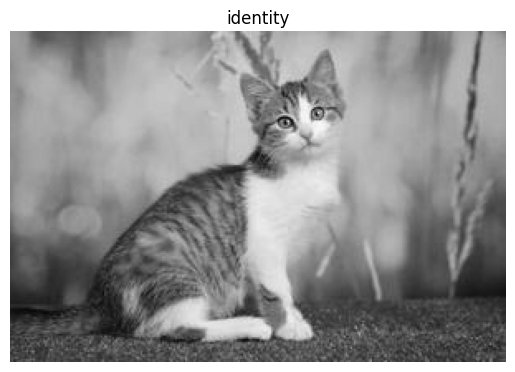

(3, 3)
(200, 300)


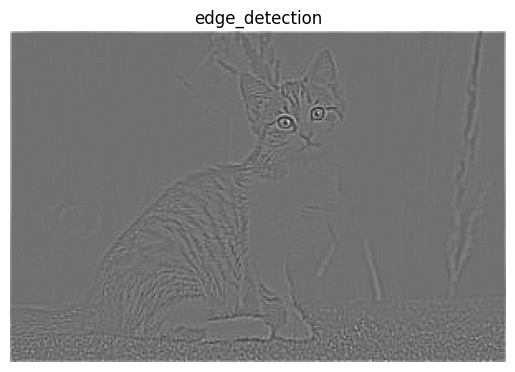

(3, 3)
(200, 300)


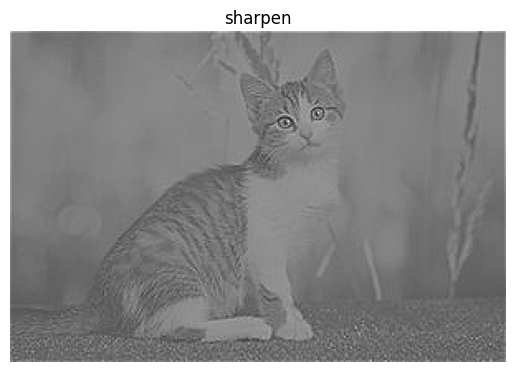

(3, 3)
(200, 300)


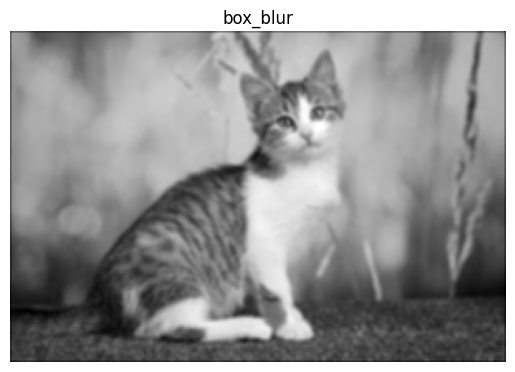

(3, 3)
(200, 300)


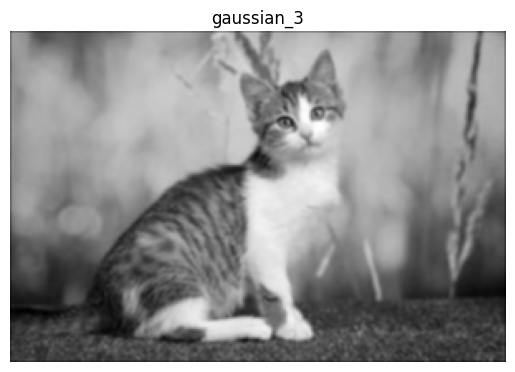

(5, 5)
(200, 300)


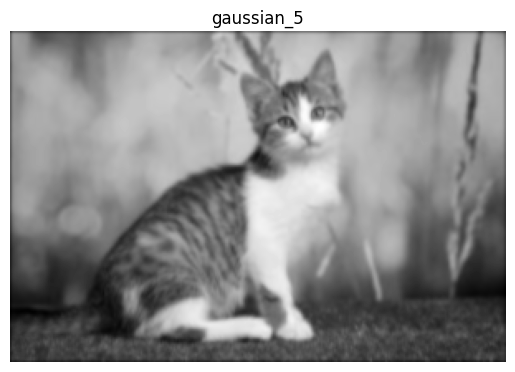

(5, 5)
(200, 300)


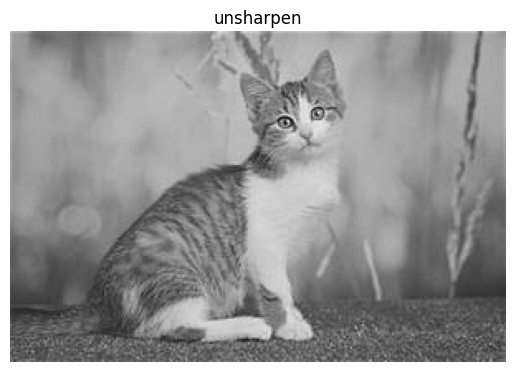

In [29]:
for kernel_name, kernel in kernels.items():
    filtered_img = feature_extractor(image, kernel)
    print(kernel.shape)
    plt.imshow(filtered_img, cmap = "gray"), plt.title(kernel_name), plt.axis("off")
    print(filtered_img.shape)
    plt.show()

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

In [30]:
def rotate_img(image,degree):
    image = RGB2Gray(image)
    target_image = np.zeros(image.shape)
    image_center = (image.shape[0]//2,image.shape[1]//2)
    theta = np.radians(degree)
    rotational_matrix = np.array([[np.cos(theta), np.sin(theta)],
                                  [-np.sin(theta), np.cos(theta)]])

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            new_coord = np.dot(rotational_matrix, np.array([x,y]) - image_center) + image_center
            new_x, new_y = int(new_coord[0]), int(new_coord[1])
            if 0 <= new_x < image.shape[0] and 0 <= new_y < image.shape[1]:  # to check if the new_coords are inside the (512, 512) shape
                target_image[x,y] = image[new_x,new_y] #taking vals from source to target

    return target_image

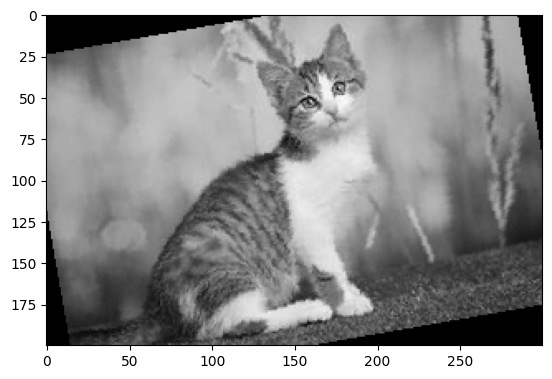

In [31]:
rotated_img = rotate_img(image, 10)
plt.imshow(rotated_img, cmap = "gray")